## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.359168 -0.272934 -0.744233 -1.273685 -0.829431 -1.942951
1 -0.607641 -0.838034  1.260848  0.189377  0.723431  0.115532
2  0.538270 -1.474060  1.227467  0.548227  1.088524  0.149330
3  1.755693  0.901849 -1.070291 -1.081640  0.193725 -0.135698
4 -0.602913 -1.052967  0.711949 -1.433628 -0.029716 -1.638728


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0337046	total: 68.7ms	remaining: 1m 8s
1:	learn: 1.0245590	total: 69.4ms	remaining: 34.6s
2:	learn: 1.0128758	total: 70.1ms	remaining: 23.3s
3:	learn: 1.0018060	total: 70.6ms	remaining: 17.6s
4:	learn: 0.9926491	total: 71.2ms	remaining: 14.2s
5:	learn: 0.9820865	total: 71.8ms	remaining: 11.9s
6:	learn: 0.9704145	total: 72.3ms	remaining: 10.3s
7:	learn: 0.9608226	total: 72.8ms	remaining: 9.03s
8:	learn: 0.9528480	total: 73.4ms	remaining: 8.08s
9:	learn: 0.9435546	total: 74ms	remaining: 7.33s
10:	learn: 0.9337218	total: 74.5ms	remaining: 6.7s
11:	learn: 0.9236352	total: 75.2ms	remaining: 6.19s
12:	learn: 0.9145475	total: 75.6ms	remaining: 5.74s
13:	learn: 0.9054053	total: 76.2ms	remaining: 5.36s
14:	learn: 0.8971151	total: 76.7ms	remaining: 5.04s
15:	learn: 0.8869523	total: 77.2ms	remaining: 4.75s
16:	learn: 0.8799842	total: 77.7ms	remaining: 4.49s
17:	learn: 0.8715940	total: 78.2ms	remaining: 4.26s
18:	learn: 0.8628377	total: 78.7ms	remaining: 4

85:	learn: 0.4746873	total: 110ms	remaining: 1.16s
86:	learn: 0.4702479	total: 110ms	remaining: 1.16s
87:	learn: 0.4663888	total: 111ms	remaining: 1.15s
88:	learn: 0.4624890	total: 111ms	remaining: 1.14s
89:	learn: 0.4588206	total: 112ms	remaining: 1.13s
90:	learn: 0.4553999	total: 112ms	remaining: 1.12s
91:	learn: 0.4516696	total: 113ms	remaining: 1.11s
92:	learn: 0.4476263	total: 113ms	remaining: 1.1s
93:	learn: 0.4446666	total: 114ms	remaining: 1.1s
94:	learn: 0.4415016	total: 114ms	remaining: 1.09s
95:	learn: 0.4379451	total: 115ms	remaining: 1.08s
96:	learn: 0.4348804	total: 115ms	remaining: 1.07s
97:	learn: 0.4314350	total: 116ms	remaining: 1.06s
98:	learn: 0.4277463	total: 116ms	remaining: 1.06s
99:	learn: 0.4243049	total: 117ms	remaining: 1.05s
100:	learn: 0.4203480	total: 117ms	remaining: 1.04s
101:	learn: 0.4169732	total: 118ms	remaining: 1.04s
102:	learn: 0.4141652	total: 118ms	remaining: 1.03s
103:	learn: 0.4108529	total: 119ms	remaining: 1.02s
104:	learn: 0.4079809	total: 

254:	learn: 0.1355156	total: 188ms	remaining: 549ms
255:	learn: 0.1346988	total: 188ms	remaining: 548ms
256:	learn: 0.1337461	total: 189ms	remaining: 546ms
257:	learn: 0.1331038	total: 190ms	remaining: 545ms
258:	learn: 0.1323618	total: 190ms	remaining: 544ms
259:	learn: 0.1312784	total: 190ms	remaining: 542ms
260:	learn: 0.1303963	total: 191ms	remaining: 541ms
261:	learn: 0.1296442	total: 191ms	remaining: 539ms
262:	learn: 0.1288428	total: 192ms	remaining: 538ms
263:	learn: 0.1279036	total: 192ms	remaining: 536ms
264:	learn: 0.1272691	total: 193ms	remaining: 535ms
265:	learn: 0.1265928	total: 193ms	remaining: 533ms
266:	learn: 0.1258558	total: 194ms	remaining: 532ms
267:	learn: 0.1251643	total: 194ms	remaining: 530ms
268:	learn: 0.1242920	total: 195ms	remaining: 529ms
269:	learn: 0.1234840	total: 195ms	remaining: 527ms
270:	learn: 0.1225987	total: 195ms	remaining: 526ms
271:	learn: 0.1217874	total: 196ms	remaining: 524ms
272:	learn: 0.1210876	total: 196ms	remaining: 522ms
273:	learn: 

476:	learn: 0.0437447	total: 293ms	remaining: 322ms
477:	learn: 0.0436211	total: 294ms	remaining: 321ms
478:	learn: 0.0433891	total: 294ms	remaining: 320ms
479:	learn: 0.0431902	total: 295ms	remaining: 319ms
480:	learn: 0.0430748	total: 295ms	remaining: 318ms
481:	learn: 0.0428638	total: 296ms	remaining: 318ms
482:	learn: 0.0427507	total: 296ms	remaining: 317ms
483:	learn: 0.0426361	total: 297ms	remaining: 316ms
484:	learn: 0.0424134	total: 297ms	remaining: 316ms
485:	learn: 0.0422226	total: 298ms	remaining: 315ms
486:	learn: 0.0420316	total: 298ms	remaining: 314ms
487:	learn: 0.0419227	total: 299ms	remaining: 313ms
488:	learn: 0.0417204	total: 299ms	remaining: 313ms
489:	learn: 0.0416137	total: 300ms	remaining: 312ms
490:	learn: 0.0414463	total: 300ms	remaining: 311ms
491:	learn: 0.0411946	total: 301ms	remaining: 311ms
492:	learn: 0.0411039	total: 301ms	remaining: 310ms
493:	learn: 0.0408577	total: 302ms	remaining: 309ms
494:	learn: 0.0406521	total: 302ms	remaining: 308ms
495:	learn: 

644:	learn: 0.0212225	total: 372ms	remaining: 204ms
645:	learn: 0.0211480	total: 372ms	remaining: 204ms
646:	learn: 0.0210863	total: 373ms	remaining: 203ms
647:	learn: 0.0210258	total: 373ms	remaining: 203ms
648:	learn: 0.0209664	total: 373ms	remaining: 202ms
649:	learn: 0.0208759	total: 374ms	remaining: 201ms
650:	learn: 0.0207754	total: 374ms	remaining: 201ms
651:	learn: 0.0207055	total: 375ms	remaining: 200ms
652:	learn: 0.0206177	total: 375ms	remaining: 199ms
653:	learn: 0.0205607	total: 376ms	remaining: 199ms
654:	learn: 0.0204690	total: 376ms	remaining: 198ms
655:	learn: 0.0203929	total: 377ms	remaining: 197ms
656:	learn: 0.0202789	total: 377ms	remaining: 197ms
657:	learn: 0.0202288	total: 378ms	remaining: 197ms
658:	learn: 0.0201367	total: 379ms	remaining: 196ms
659:	learn: 0.0200257	total: 379ms	remaining: 195ms
660:	learn: 0.0199357	total: 380ms	remaining: 195ms
661:	learn: 0.0198640	total: 380ms	remaining: 194ms
662:	learn: 0.0197562	total: 380ms	remaining: 193ms
663:	learn: 

877:	learn: 0.0102310	total: 477ms	remaining: 66.2ms
878:	learn: 0.0102259	total: 477ms	remaining: 65.7ms
879:	learn: 0.0101854	total: 478ms	remaining: 65.1ms
880:	learn: 0.0101653	total: 478ms	remaining: 64.6ms
881:	learn: 0.0101602	total: 478ms	remaining: 64ms
882:	learn: 0.0101222	total: 479ms	remaining: 63.5ms
883:	learn: 0.0101024	total: 479ms	remaining: 62.9ms
884:	learn: 0.0100638	total: 480ms	remaining: 62.4ms
885:	learn: 0.0100348	total: 480ms	remaining: 61.8ms
886:	learn: 0.0099970	total: 481ms	remaining: 61.3ms
887:	learn: 0.0099495	total: 481ms	remaining: 60.7ms
888:	learn: 0.0099126	total: 482ms	remaining: 60.2ms
889:	learn: 0.0098769	total: 482ms	remaining: 59.6ms
890:	learn: 0.0098515	total: 483ms	remaining: 59.1ms
891:	learn: 0.0098056	total: 483ms	remaining: 58.5ms
892:	learn: 0.0097697	total: 484ms	remaining: 58ms
893:	learn: 0.0097354	total: 484ms	remaining: 57.4ms
894:	learn: 0.0096807	total: 485ms	remaining: 56.9ms
895:	learn: 0.0096675	total: 485ms	remaining: 56.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

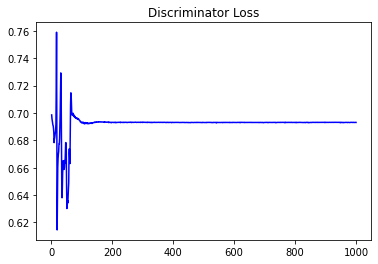

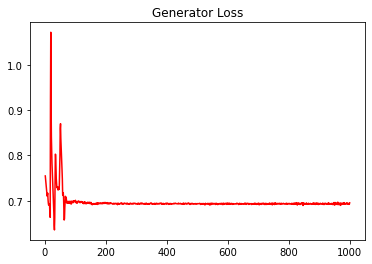

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.036387166019364106


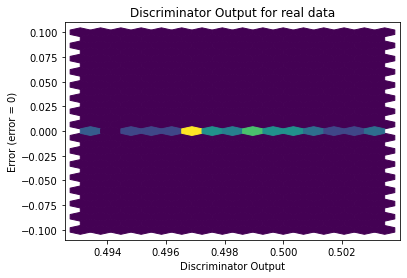

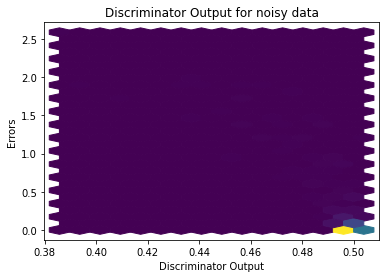

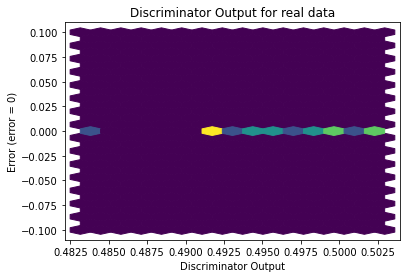

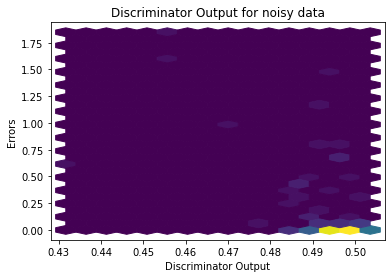

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


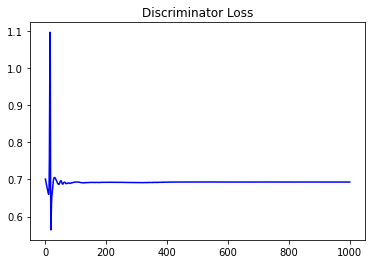

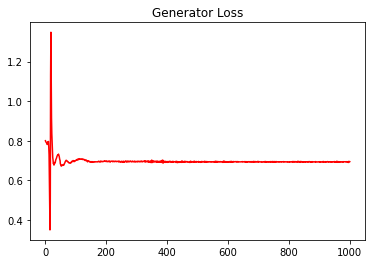

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.05433543291303533


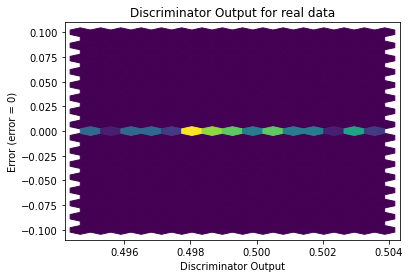

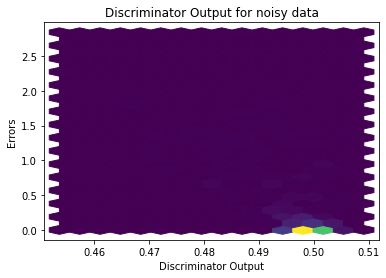

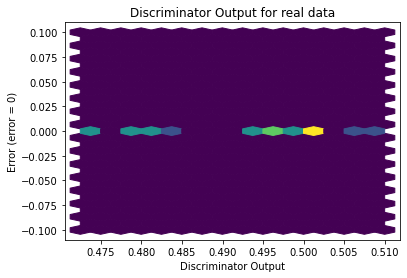

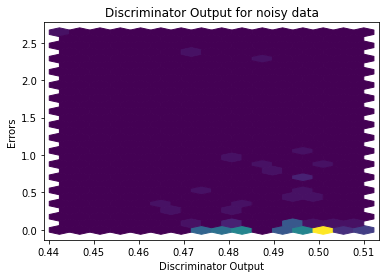

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0676]], requires_grad=True)
